In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 15, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100


from datetime import datetime
str(datetime.now())



'2017-10-23 17:00:27.136517'

In [3]:
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')

/Users/MarkelovIgor/git/biogeochemistry/MyLake_v2_Vansjo/Postproc_code/data.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


In [35]:
plotter = ResultsPlotter(f='../IO/calibrated.mat')

### Phosphorus

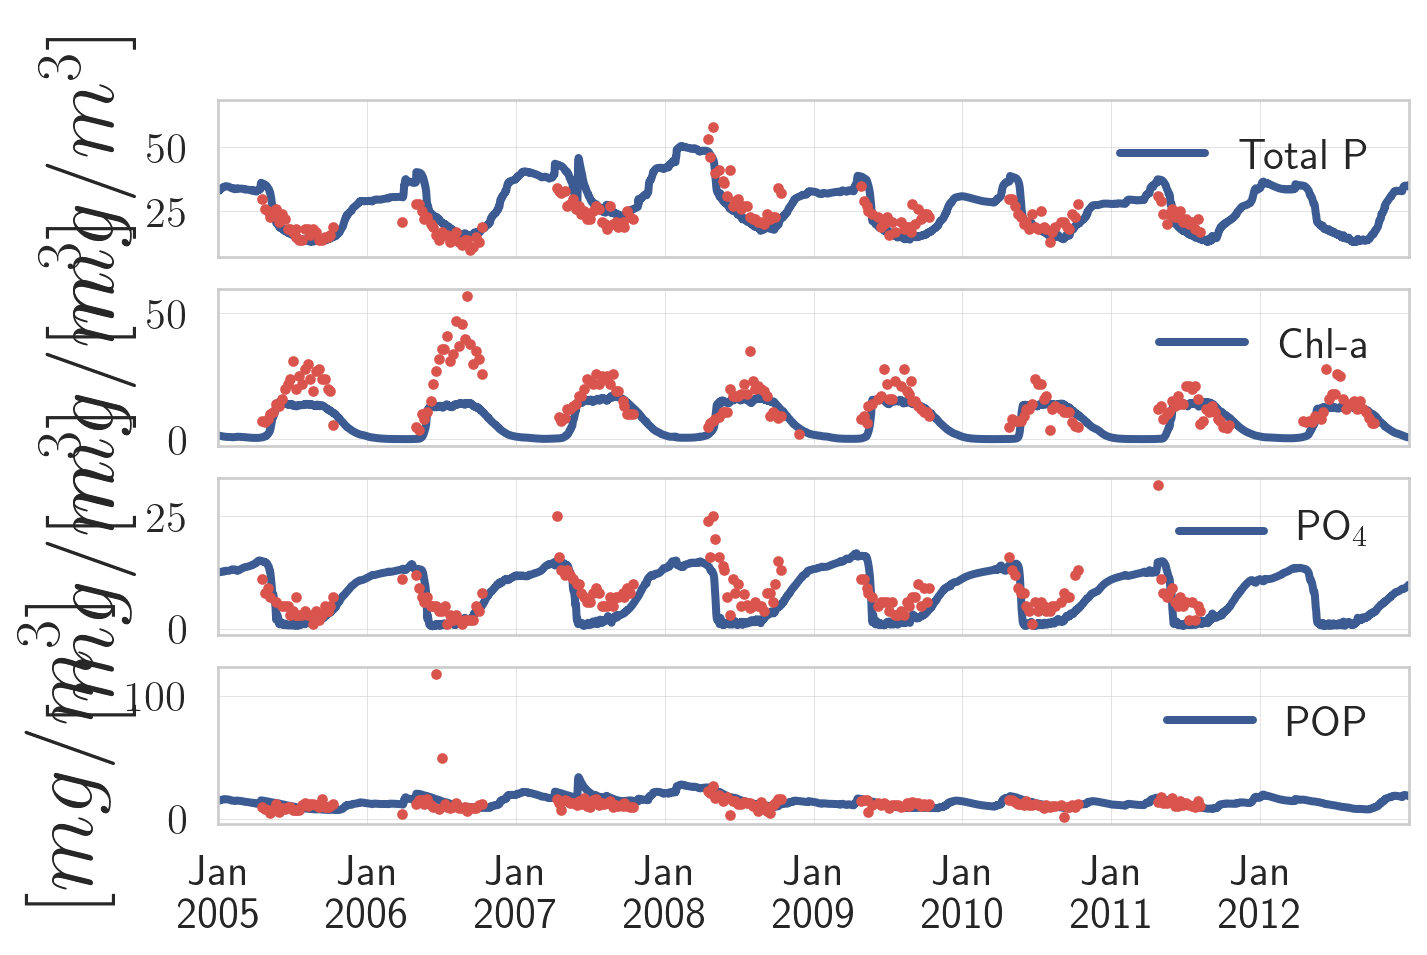

In [36]:
plotter.phosphorus_fit()

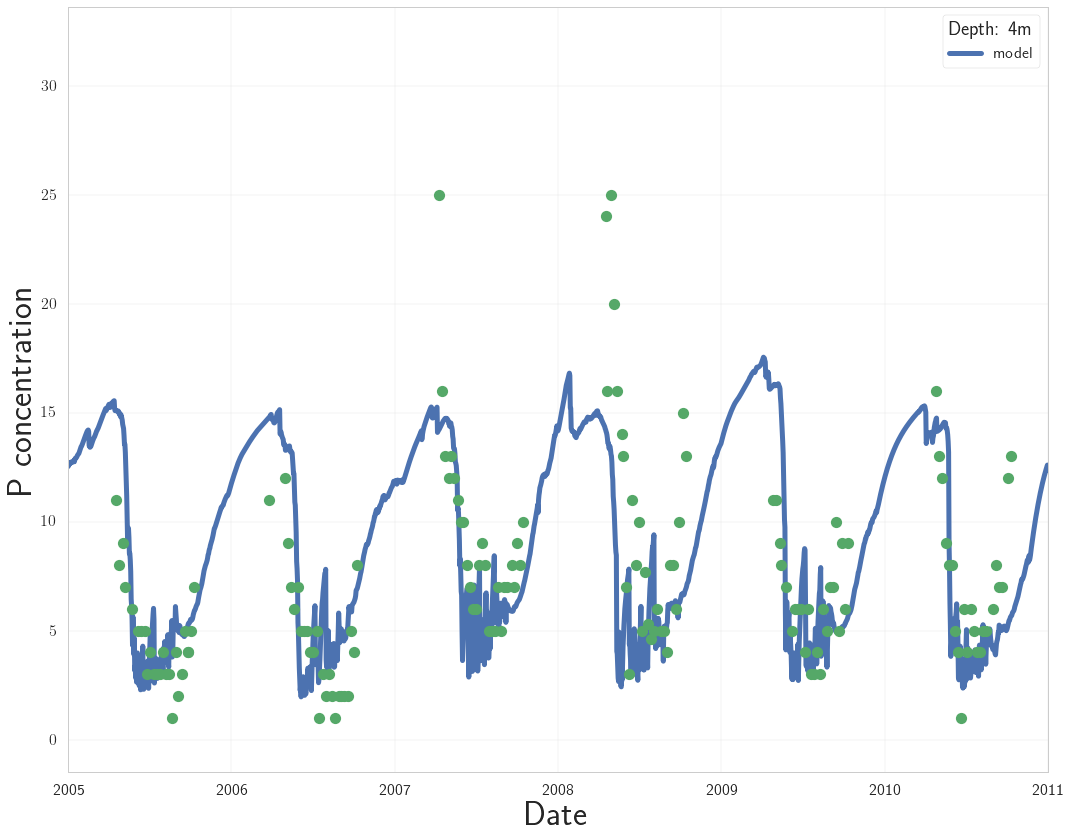

In [37]:
ax = plotter.plot_fit_wc(['P'], depth=4, dstart='2005-01-01', dend='2011-01-01', factor=1)
data.plot_depth(df, 'PO4-P', depth=0, ax=ax)

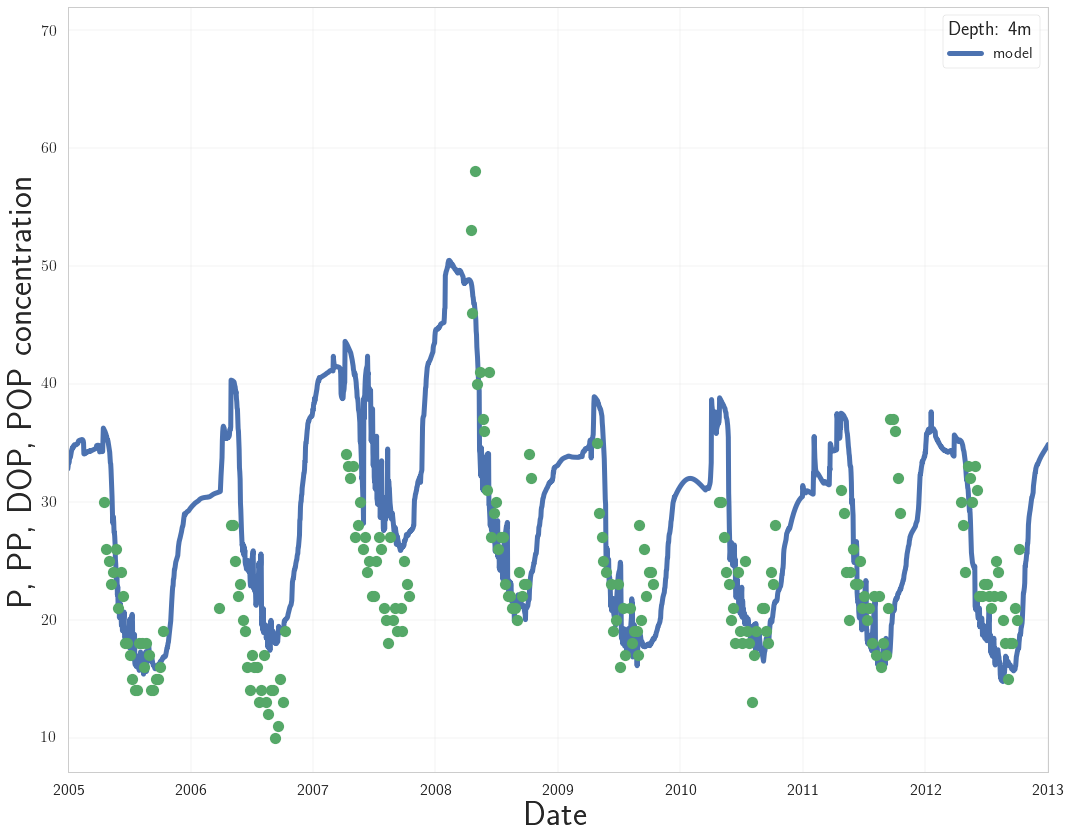

In [38]:
ax = plotter.plot_fit_wc(['P', 'PP', 'DOP', 'POP'], depth=4, dstart='2005-01-01', dend='2013-01-01', factor=1)
data.plot_depth(df, 'TOTP', depth=0, ax=ax)

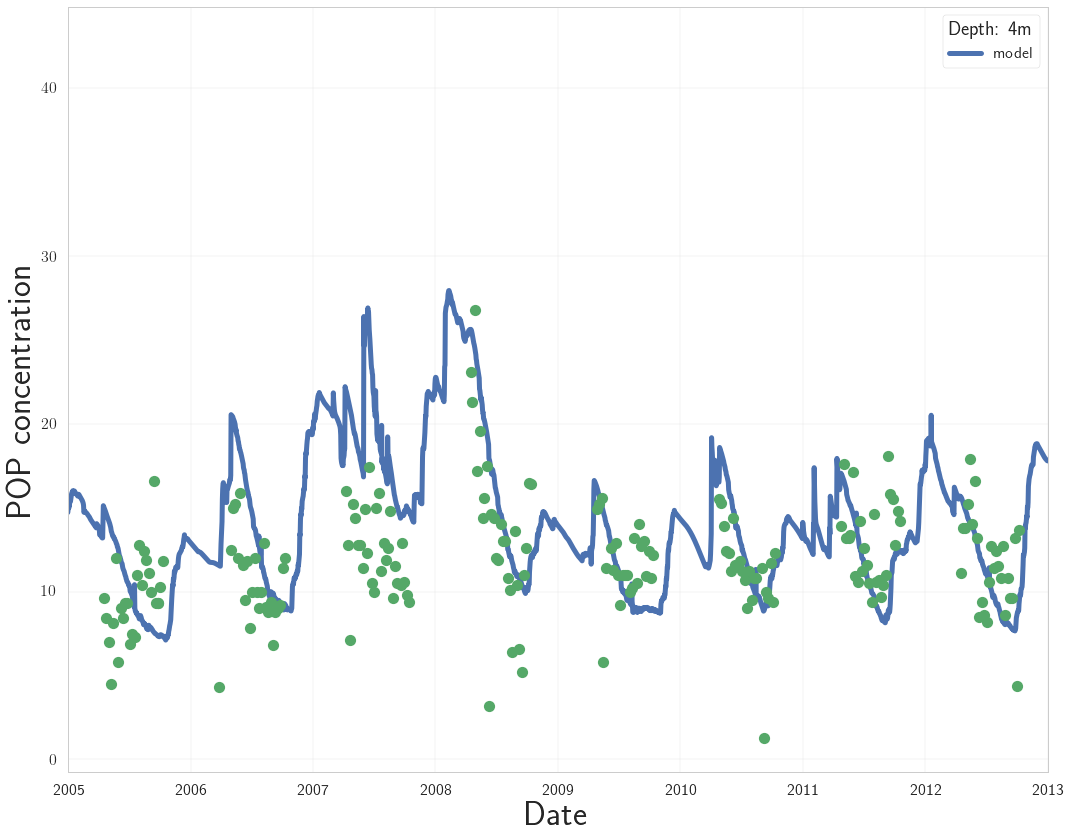

In [39]:
ax = plotter.plot_fit_wc(['POP'], depth=4, dstart='2005-01-01', dend='2013-01-01', factor=1)
data.plot_depth(df, 'POP', depth=0, ax=ax)

### Oxygen

In [40]:
value = 'O2'
d = 'Depth2'
df[df.Depth1 == df.Depth1][[d, value]].groupby(d).count()

,O2
Depth2,
0,193
1,0
2,2
3,1
4,3
5,195
6,0
7,2
8,3


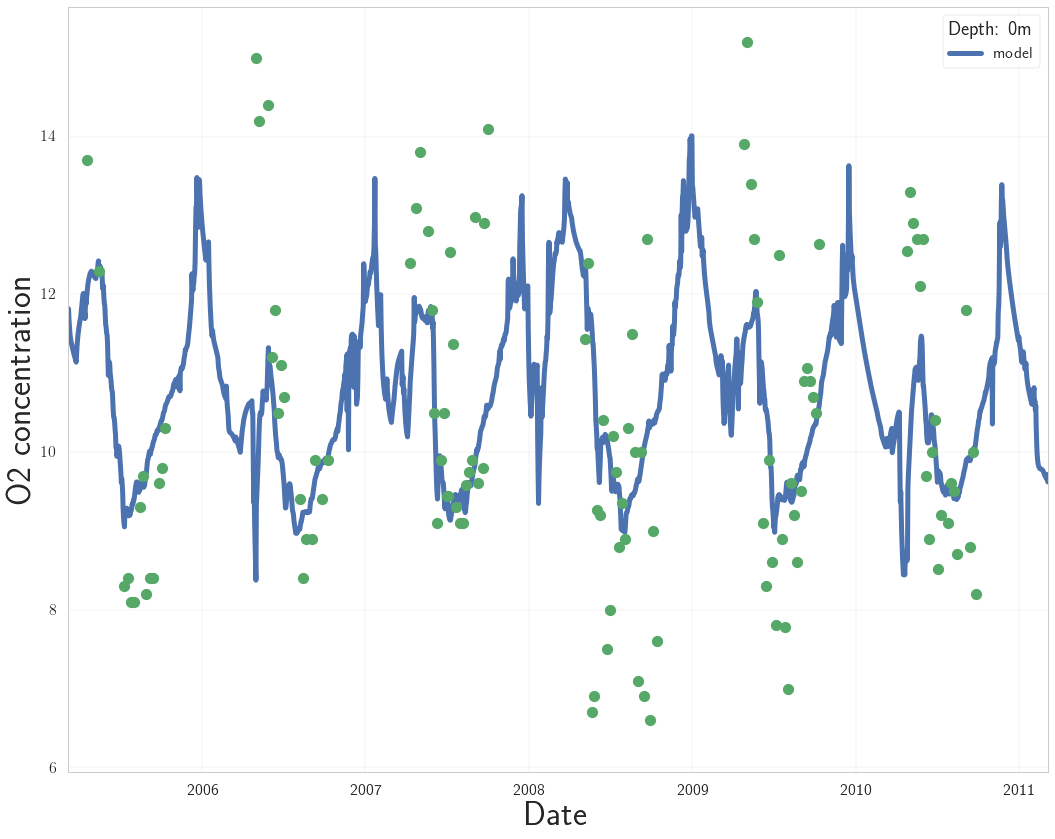

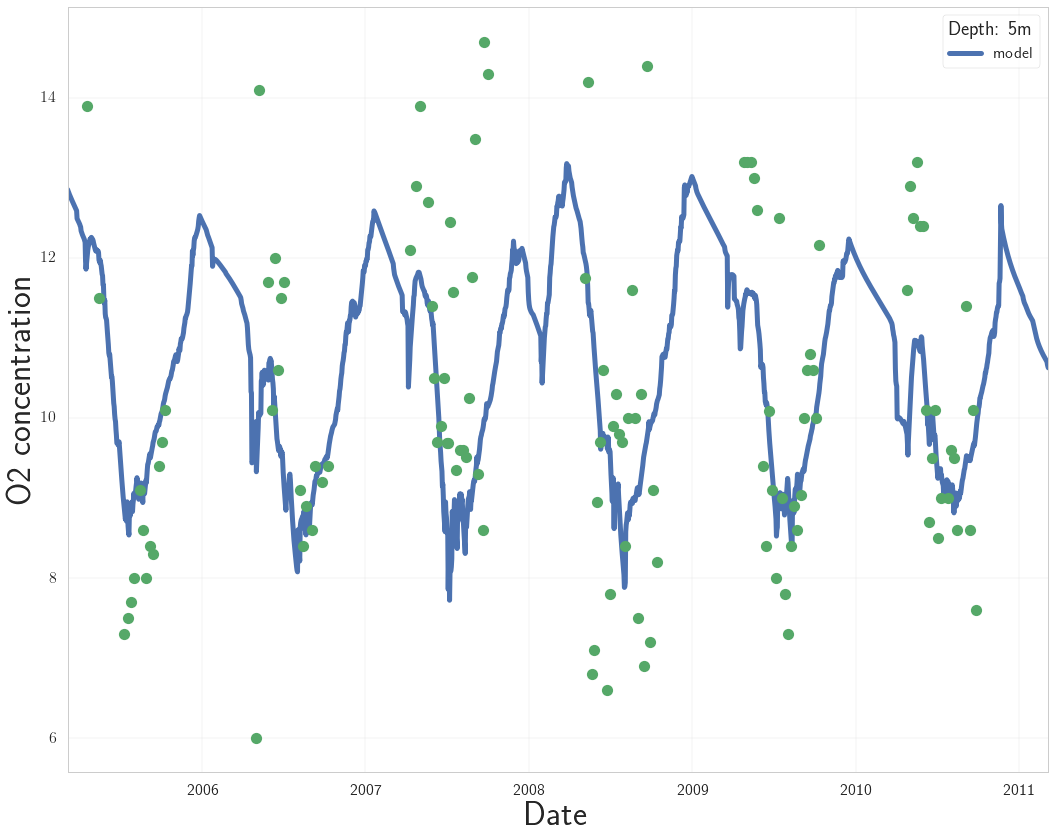

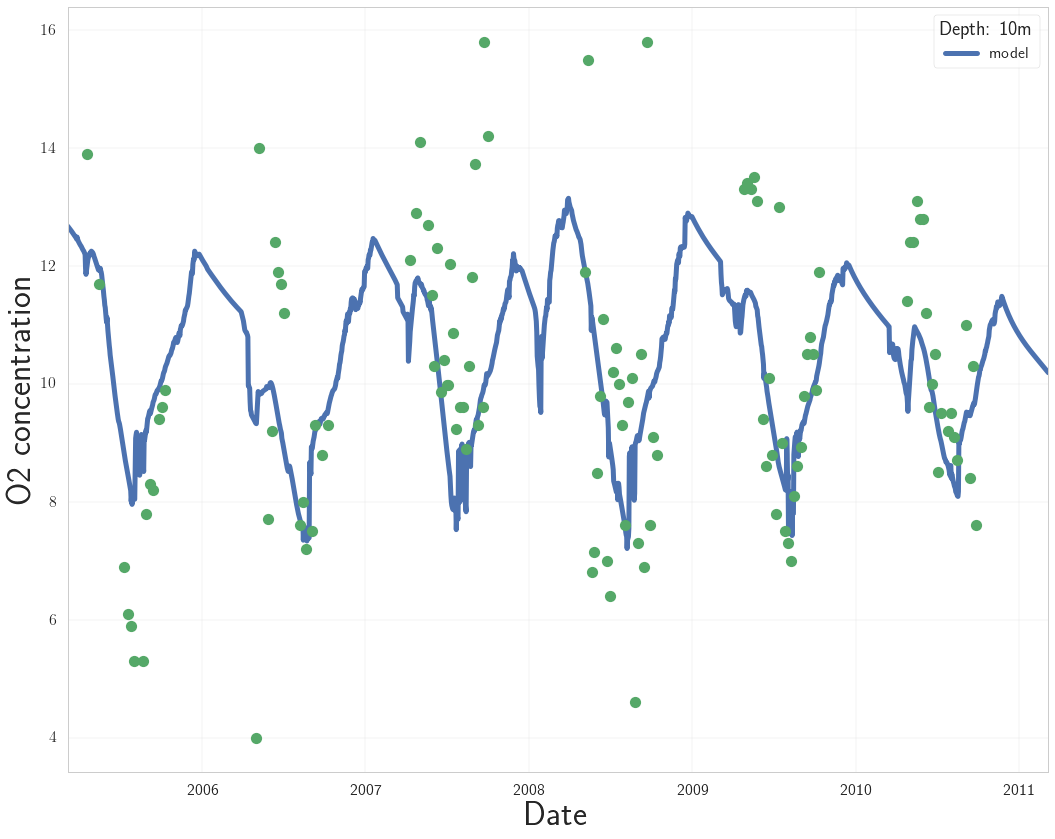

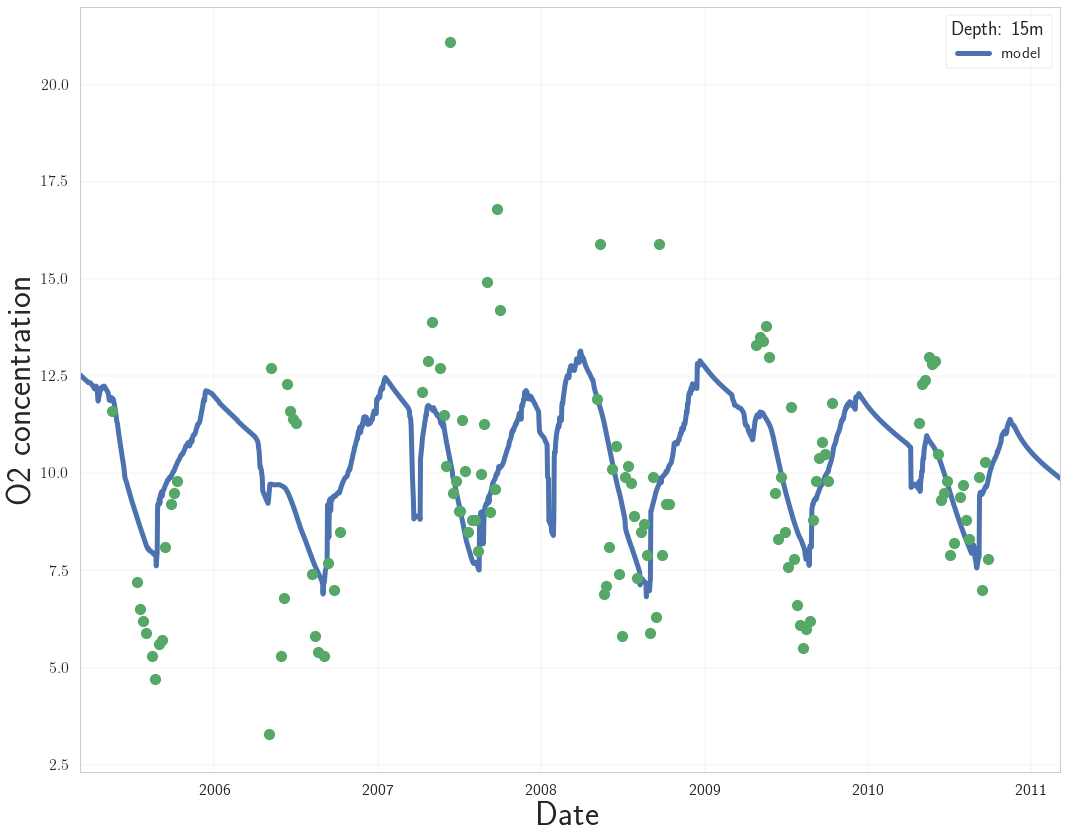

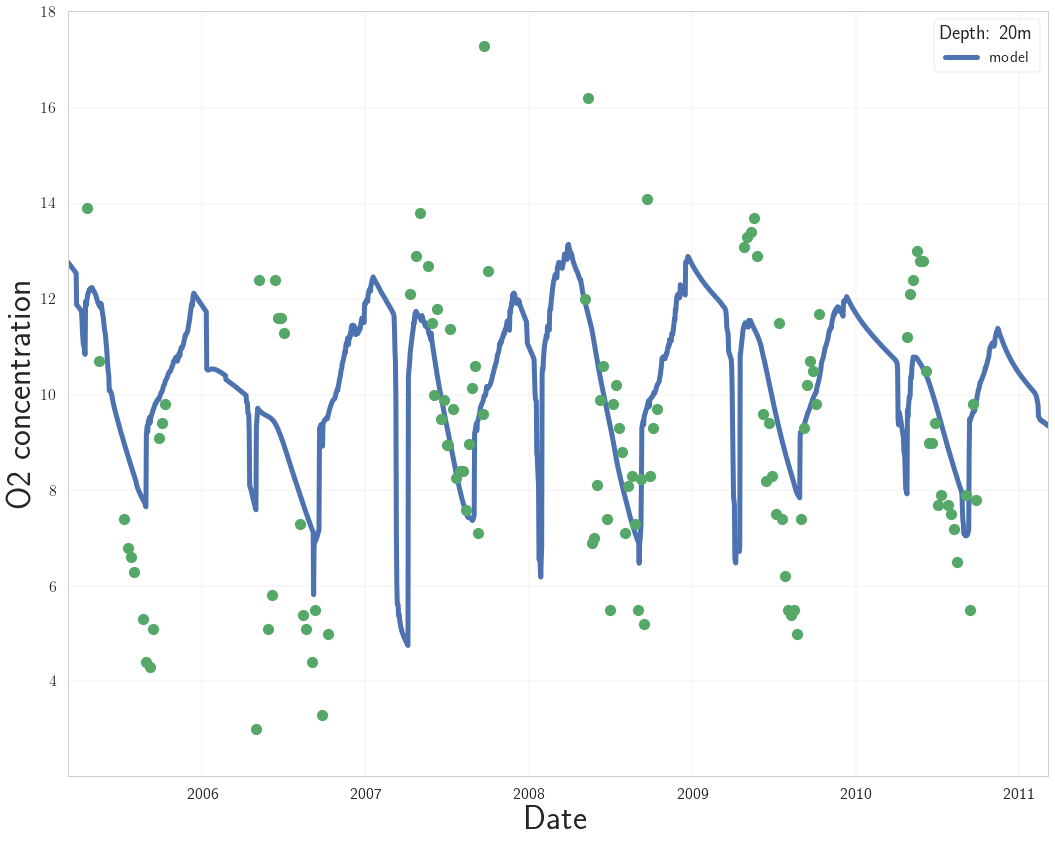

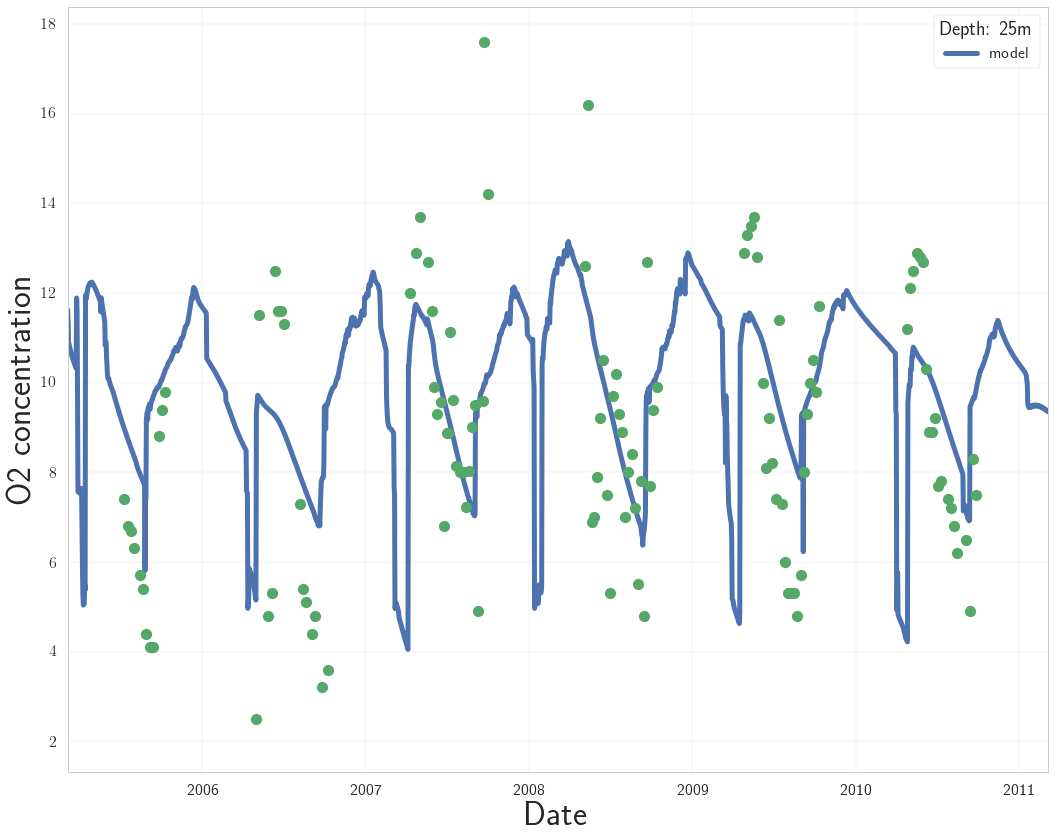

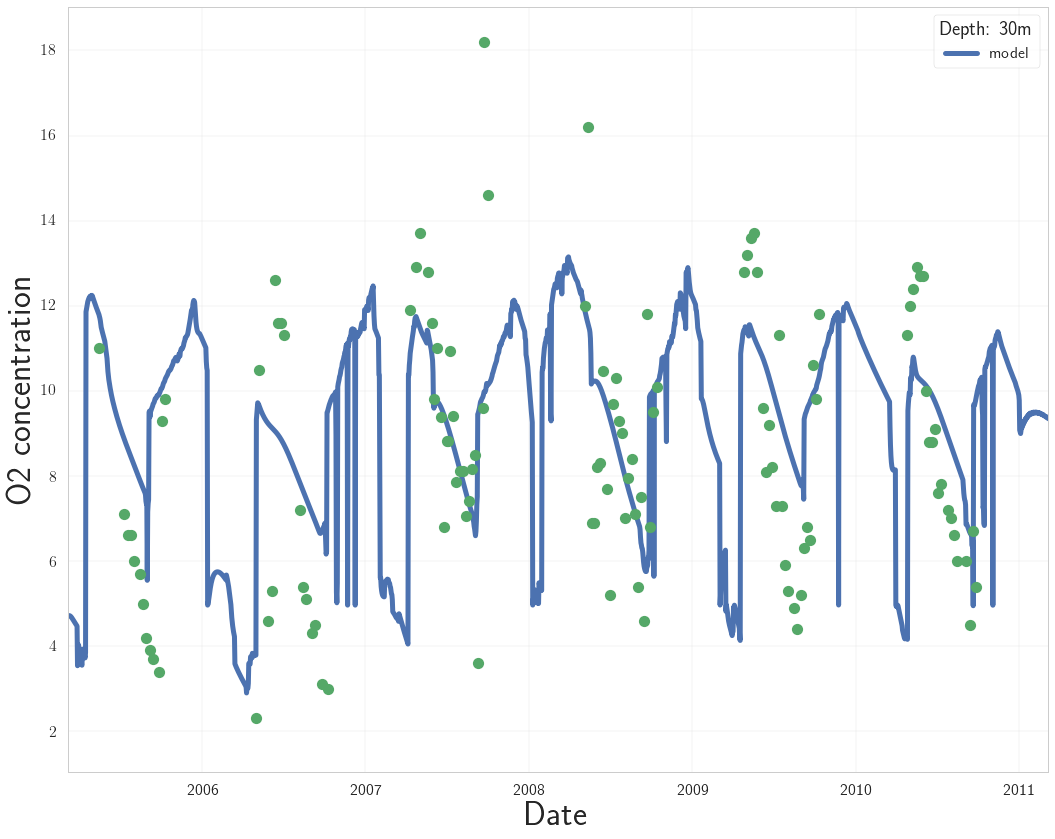

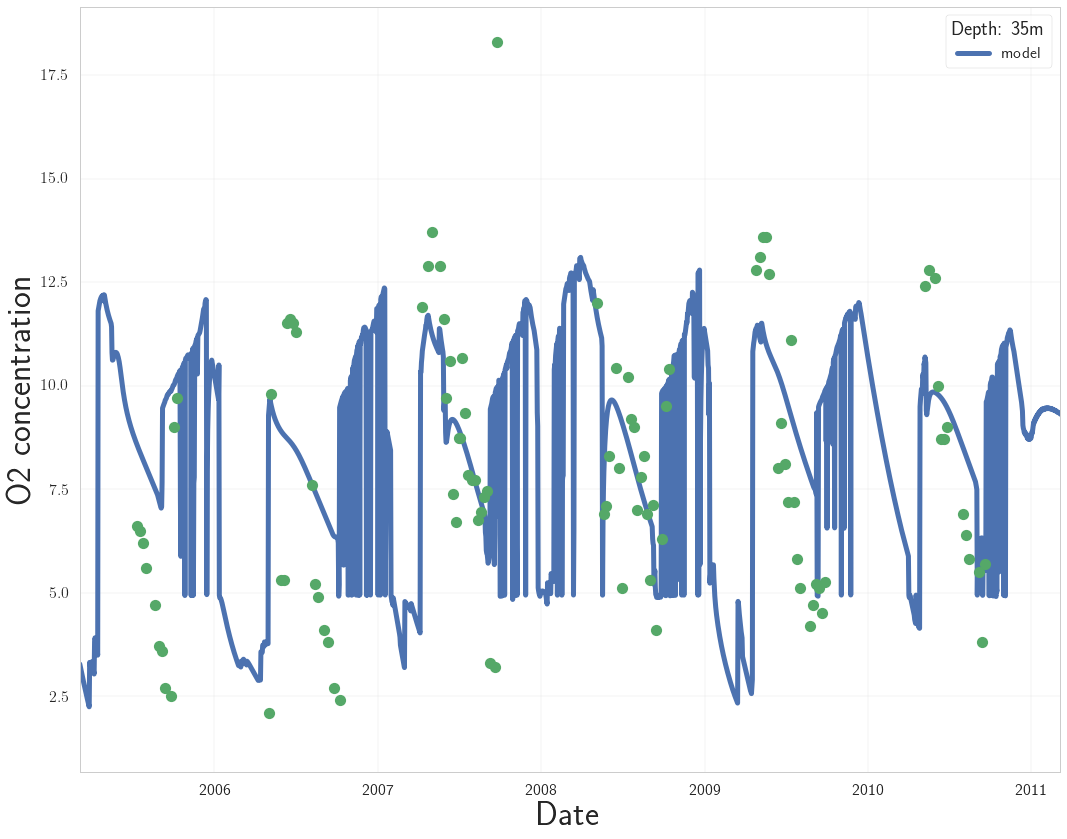

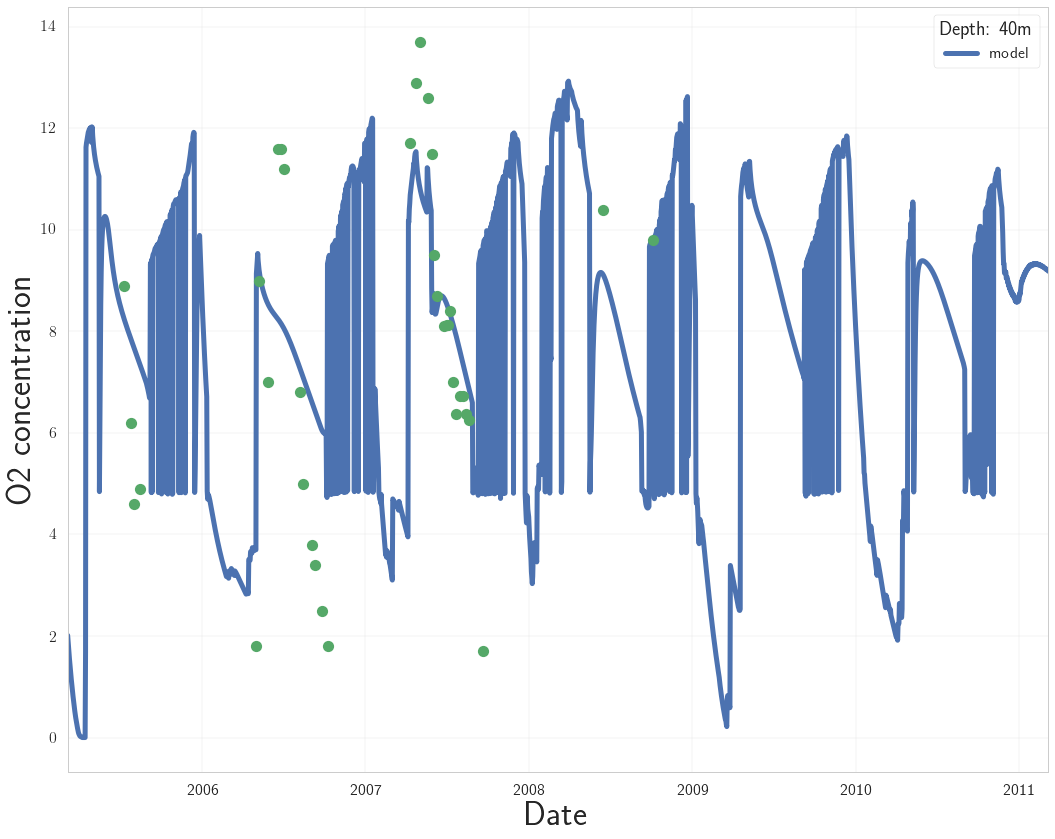

In [41]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    f, ax = plt.subplots()
    ax = plotter.oxygen_fit_wc(depth=d, ax=ax)
    ax = data.plot_depth(df[df.Depth1 == df.Depth1], 'O2', depth=d, ax=ax)

### NItrate

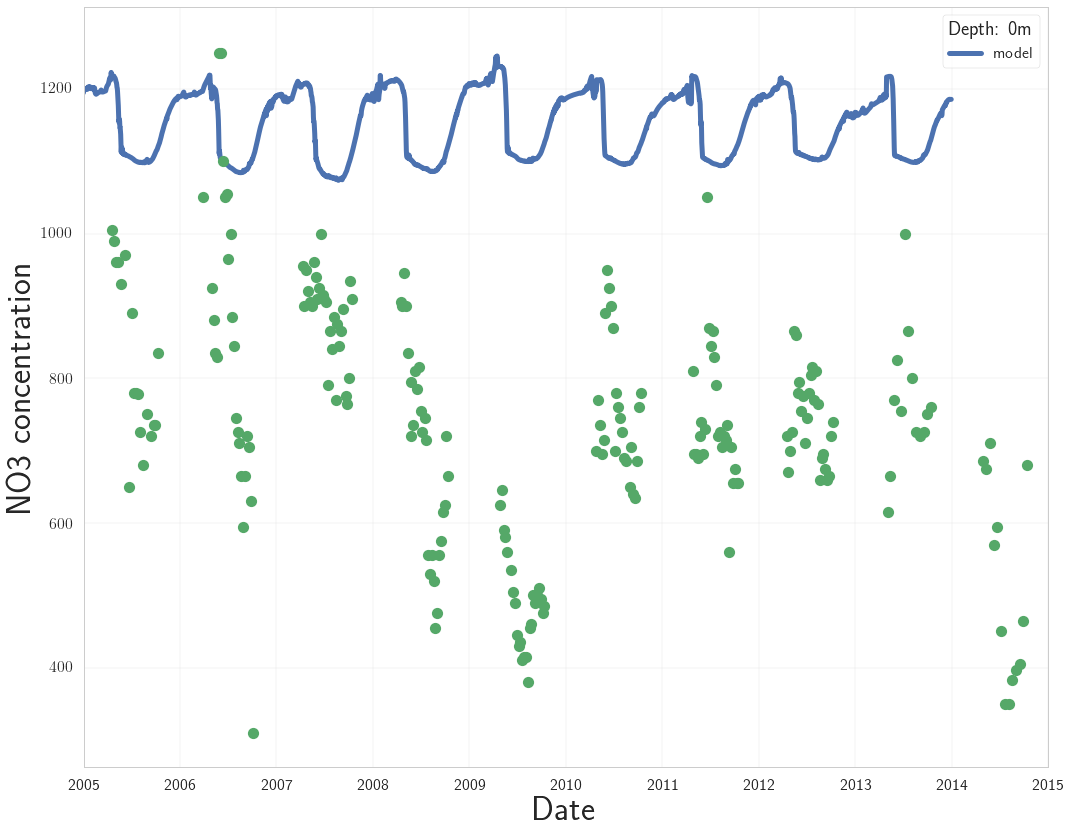

In [49]:
ax = plotter.plot_fit_wc(['NO3'], depth=0, dstart='2005-01-01', dend='2015-01-01', factor=14/62)
data.plot_depth(df, 'NO3-N', depth=0, ax=ax)

### Temperature

In [43]:
value = 'Temperatur'
df[['Depth1', value]].groupby('Depth1').count()

,Temperatur
Depth1,
0,224
1,0
2,1
3,5
4,0
5,218
6,4
7,1
8,3


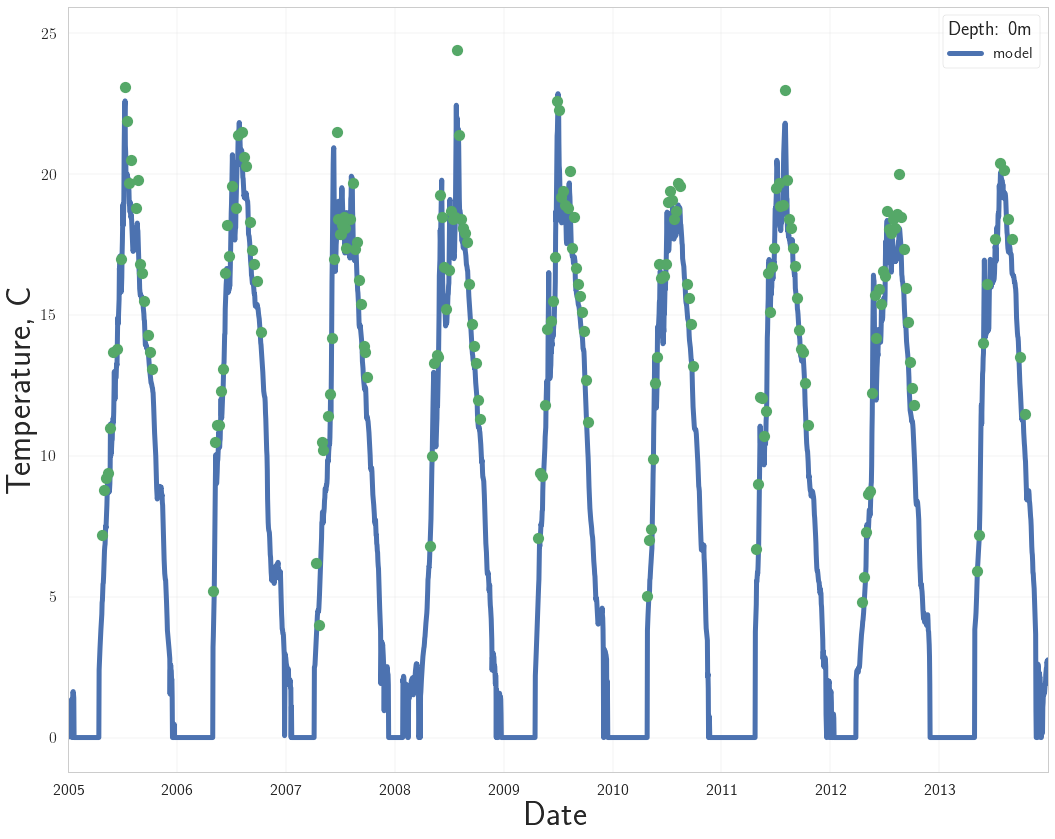

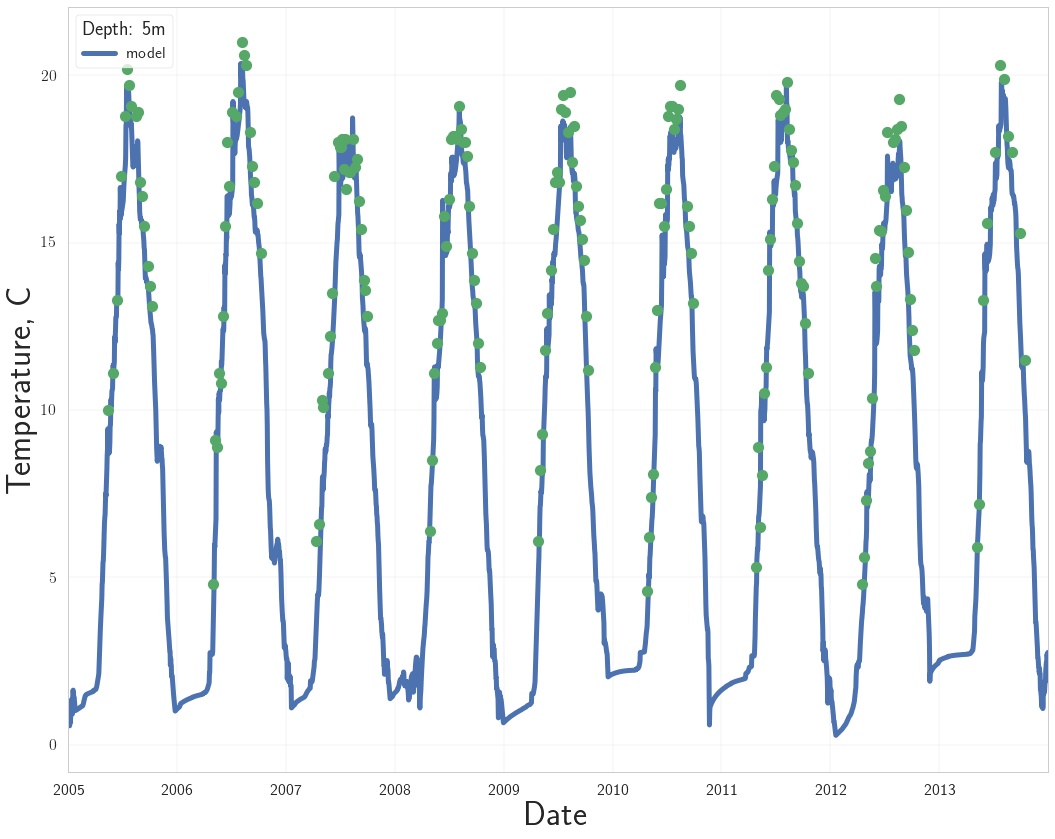

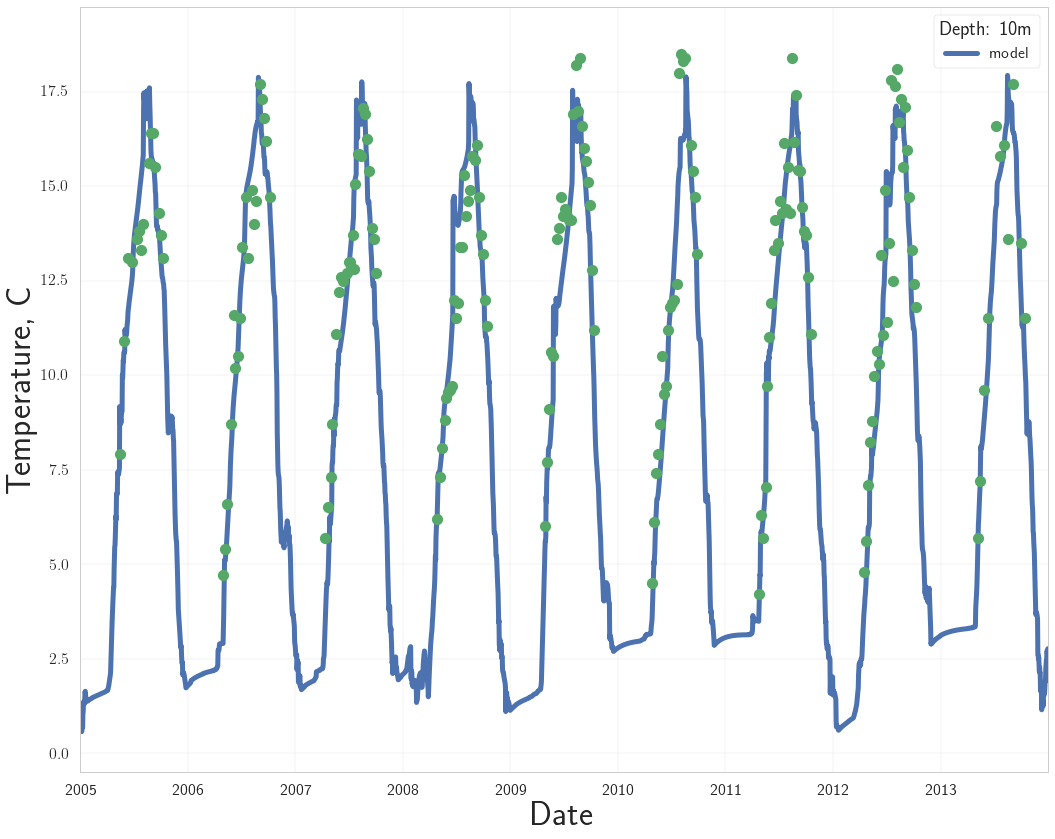

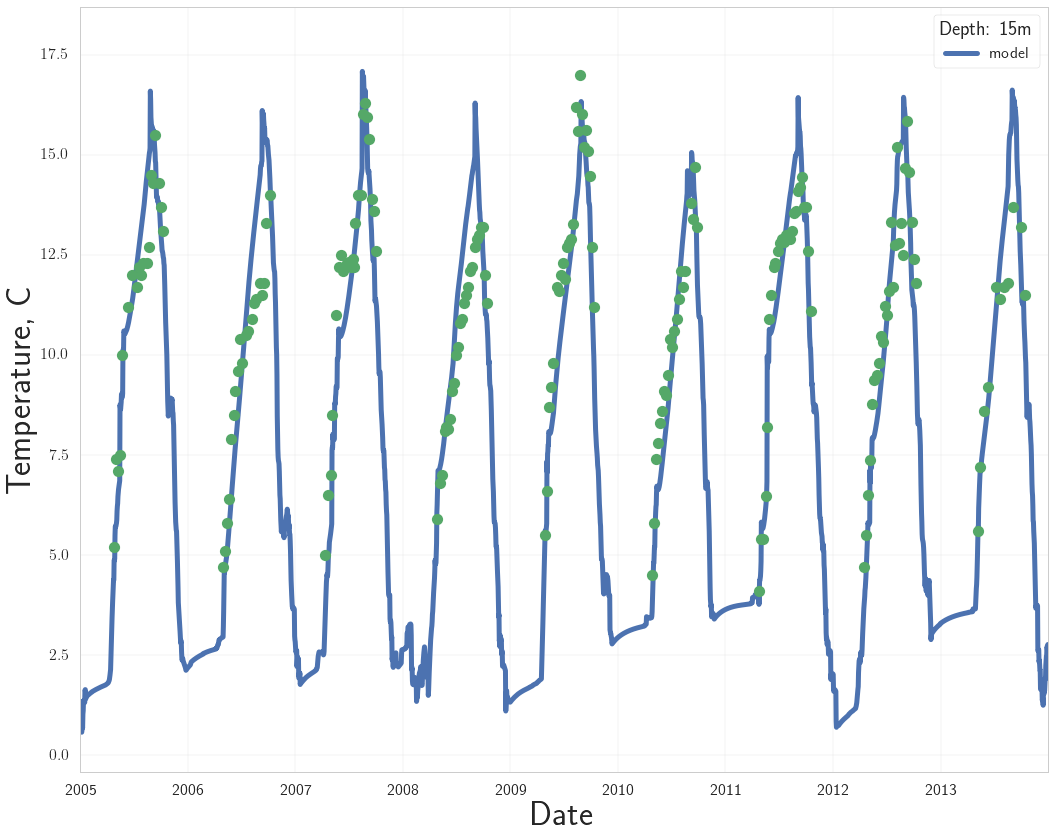

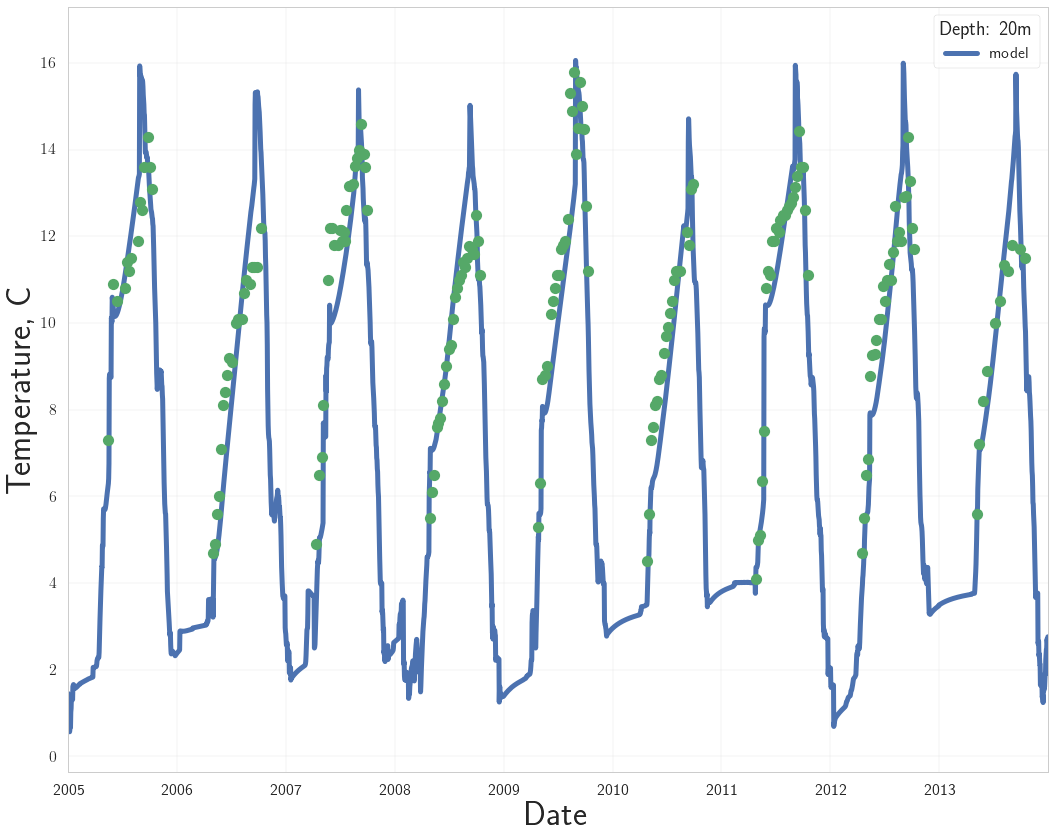

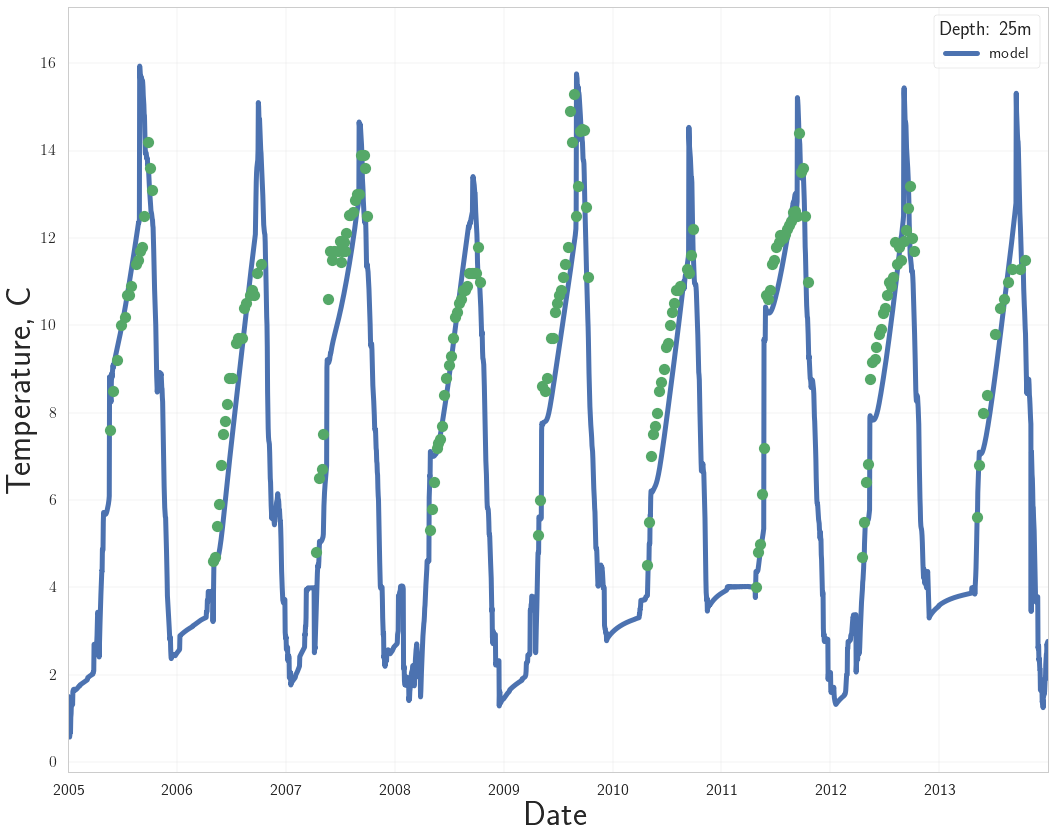

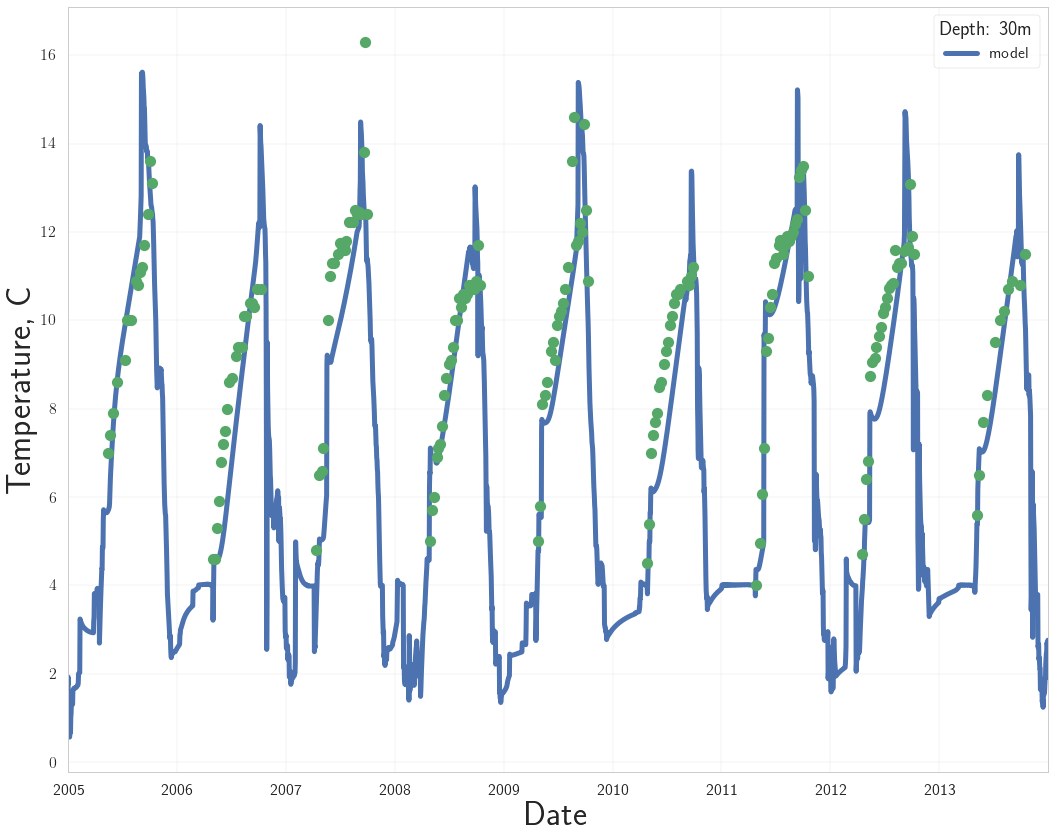

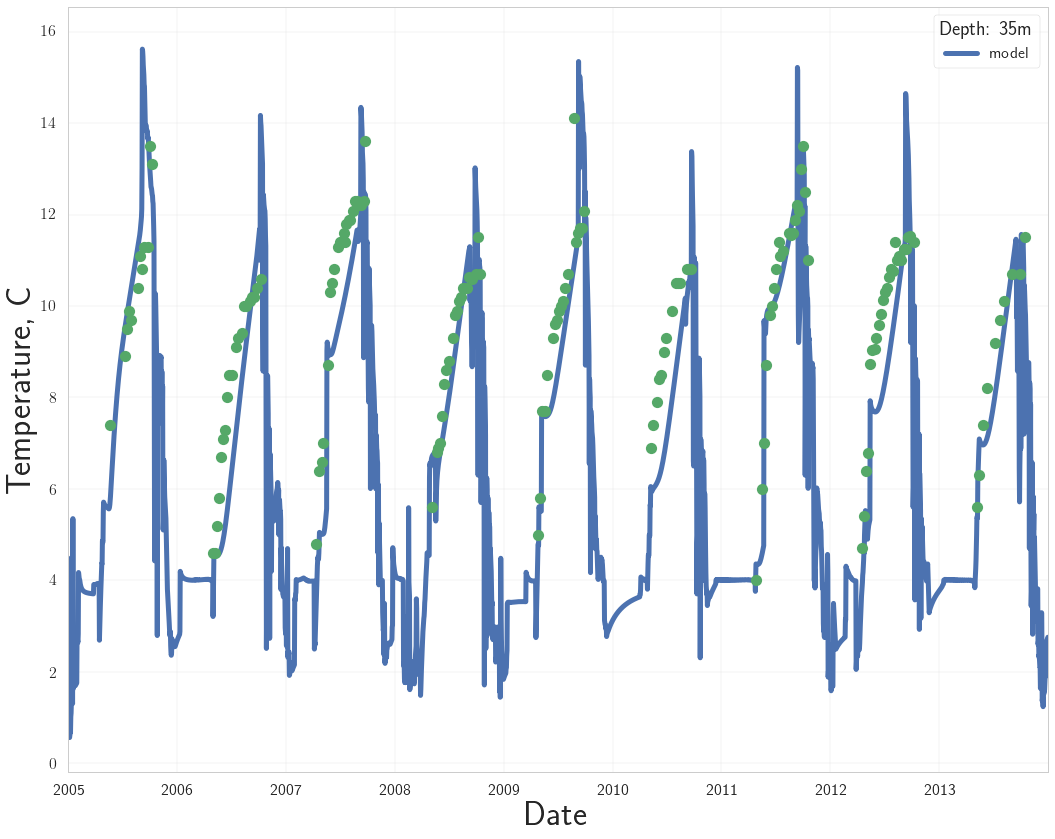

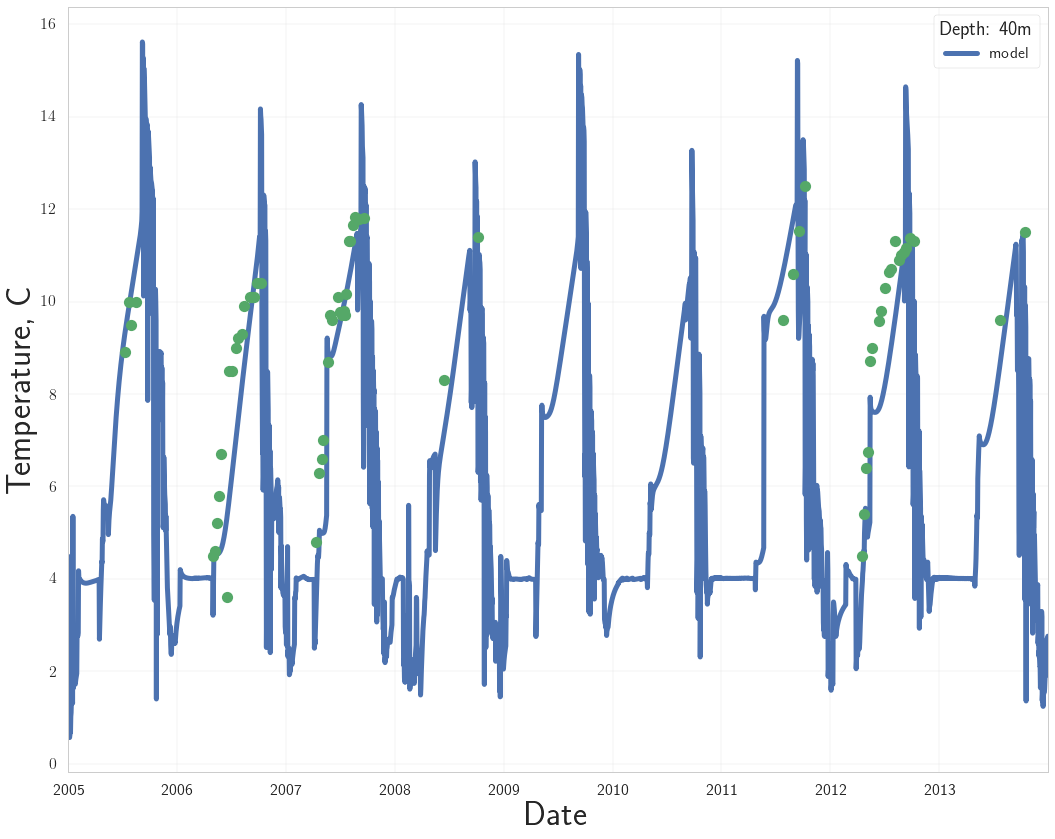

In [44]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    f, ax = plt.subplots()
    ax = plotter.plot_fit_wc(['T'], depth=d, ax=ax, dstart='2005-01-01', dend='2013-12-31')
    ax = data.plot_depth(df, 'Temperatur', depth=d, ax=ax)

In [45]:
dstart = '2006-07-1'
dend = '2006-09-1'
d = 5
value = 'Temperatur'
df[(df.Depth1==d) & (np.isfinite(df[value])) & (df['SampleDate'] > datetime.strptime(dstart, '%Y-%m-%d')) & (df['SampleDate'] < datetime.strptime(dend, '%Y-%m-%d'))][['SampleDate', value]]

,SampleDate,Temperatur
313,2006-07-03,18.9
326,2006-07-17,18.8
336,2006-07-24,19.5
348,2006-08-07,21.0
358,2006-08-14,20.6
368,2006-08-21,20.3


In [46]:
df

,ProjectId,ProjectName,StationId,StationCode,StationName,SampleDate,Depth1,Depth2,Alk_4.5,Blågrønnalger,Ca,Dinoflagellater,Euglenoider,Farge,Fytoplankton totalt biovolum,Grønnalger,Gulgrønnalger,Gullalger,Kiselalger,KlfA,Kryptomonader,Microcystin,Myalger,NH4-N,NO3-N,O2,O2 (metning),pH,Phycocyanin,PO4-P,PON,POP,Raphidop,SGR - Suspendert gløderest,Siktdyp,SiO2,STS,Temperatur,TOC,TOTN,TOTP,TOTP_P,Uspes_fytoplankton
0,321,Vansjø,9458,VAN1,Storefjorden,2005-04-18,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,321,Vansjø,9458,VAN1,Storefjorden,2005-04-18,0,4,NaN,NaN,NaN,NaN,NaN,55.0,1096.296,0.8976,NaN,24.4800,993.072,4.7,65.4432,NaN,12.4032,NaN,1005.0,NaN,NaN,6.86,NaN,11.0,NaN,9.6,NaN,4.6,NaN,3.369,5.7,NaN,8.9,1325.0,30.0,NaN,NaN
2,321,Vansjø,9458,VAN1,Storefjorden,2005-04-18,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,321,Vansjø,9458,VAN1,Storefjorden,2005-04-18,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,321,Vansjø,9458,VAN1,Storefjorden,2005-04-18,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.10,NaN,NaN,7.20,NaN,NaN,NaN,NaN,NaN
6,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,0,4,0.234,NaN,6.28,NaN,NaN,54.2,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN,NaN,990.0,NaN,NaN,6.98,NaN,8.0,NaN,8.4,NaN,3.7,NaN,3.670,5.0,NaN,8.3,1335.0,26.0,NaN,NaN
7,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.50,NaN,NaN,NaN,NaN,NaN
8,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.30,NaN,NaN,NaN,NaN,NaN
9,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.80,NaN,NaN,NaN,NaN,NaN


In [47]:
value = 'TOTN'
df[['Depth1', value]].groupby('Depth1').count()

,TOTN
Depth1,
0,241
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


In [48]:
df.columns

Index(['ProjectId', 'ProjectName', 'StationId', 'StationCode', 'StationName',
       'SampleDate', 'Depth1', 'Depth2', 'Alk_4.5', 'Blågrønnalger', 'Ca',
       'Dinoflagellater', 'Euglenoider', 'Farge',
       'Fytoplankton totalt biovolum', 'Grønnalger', 'Gulgrønnalger',
       'Gullalger', 'Kiselalger', 'KlfA', 'Kryptomonader', 'Microcystin',
       'Myalger', 'NH4-N', 'NO3-N', 'O2', 'O2 (metning)', 'pH', 'Phycocyanin',
       'PO4-P', 'PON', 'POP', 'Raphidop', 'SGR - Suspendert gløderest',
       'Siktdyp', 'SiO2', 'STS', 'Temperatur', 'TOC', 'TOTN', 'TOTP', 'TOTP_P',
       'Uspes_fytoplankton'],
      dtype='object')